# Example of Map Generation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Map generated in 0.004004 seconds


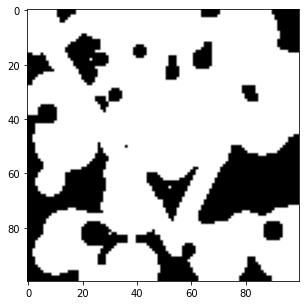

In [1]:
from swarm_mapping.map import Map
import time

np.random.seed(27)
t0 = time.time()
m = Map(100, 100, space_fill=0.8, hazard_fill=0.1, fast=True)
tf = time.time()
m.show()
print(f"Map generated in {round(tf - t0, 6)} seconds")

# World Generation

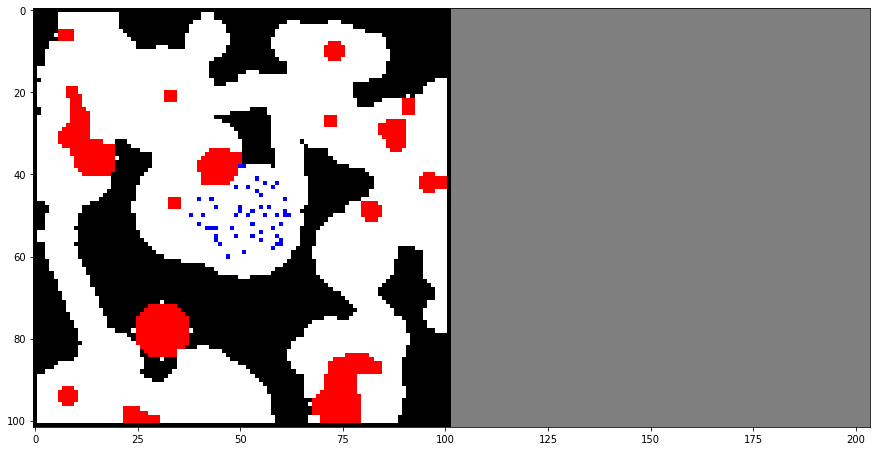

In [2]:
from swarm_mapping.world import World, Agent
from swarm_mapping.map import Map

w = World(100, 100, 50, space_fill=0.5, hazard_fill=0.2,fast=True, sensor_range=1)
w.show(size=(15,15))

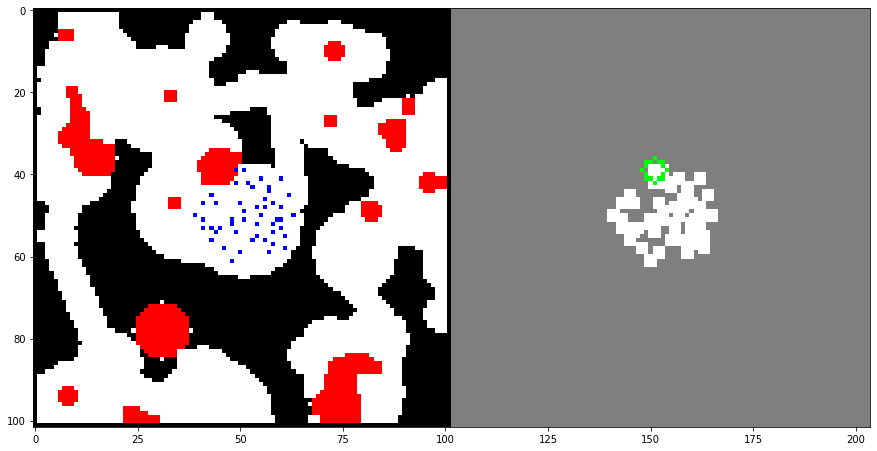

In [3]:
# Iterate a step of the sim, and then show state
w.step()
w.show(size=(15,15))

In [4]:
# Example of proximity sensor output
agent = w.agents[0]
agent.proximity()

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

### Run and Animate Simulation

In [5]:
import cv2
import numpy as np

# Display size
display_width = 1600
display_height = 800

step = 0
while True:
    frame = w.render()
    shared_map = w.render(w.agents_map)
    contour_map = w.contour_map
    frame = np.concatenate((frame, shared_map), axis=1)
    frame = cv2.resize(frame, (display_width, display_height), interpolation = cv2.INTER_AREA)
    cv2.imshow('Sim',cv2.cvtColor((frame*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    w.step()
    step += 1
cv2.destroyAllWindows()

### Print Agent States

In [6]:
for agent in w.agents:
    print(agent)

Agent at (4.1431702428187664,23.686497556578736), with velocity (-0.2597842196578234, -0.9642142175265415), alive: True
Agent at (25.244963666331426,12.931817425918478), with velocity (-0.1833927252798234, -0.9202058378423632), alive: True
Agent at (9.048935930481075,33.82102042050177), with velocity (1.1155426700323368, -0.16324794455612163), alive: False
Agent at (12.337294790049466,23.954716241636167), with velocity (-0.9037332829520426, 0.743685720529614), alive: False
Agent at (75.15224722505393,9.892482480525418), with velocity (-0.5861466901735135, 1.0382937792142362), alive: False
Agent at (10.318382906561885,15.761123590539796), with velocity (0.7441168499626085, 0.9036525896109228), alive: True
Agent at (44.33389415379401,33.5636347947535), with velocity (0.5410127583877481, 0.5956941446029358), alive: False
Agent at (30.22500773747919,39.65938539183655), with velocity (-0.8656788139187972, -0.8289875033503185), alive: True
Agent at (14.435079516366647,18.901218260171813), wi